# <center> Module 2B Homework

<center>  ISE-529 Predictive Analytics
<center> Assignment
<center> Student Name:Aditya Shrikant Chavan

*Note:  In answering the following questions, you may only use functionality from Base Python, NumPy, Pandas, or Seaborn*

#### 1.  Evaluating regression functions

1A)  The file "HW 2 Problem 1 Data.xlsx" contains two datasets - training and test in two different spreadsheet tabs.  Read the tables into two dataframes (training_data and test_data) and display the first 10 rows of each dataframe.  Hint - look up the Pandas function for reading in Excel files.

In [1]:
import pandas as pd
training_data=pd.read_csv("Problem 1 Training Dataset.csv",index_col=False)
test_data=pd.read_csv("Problem 1 Test Dataset.csv")
display(training_data.head(10))
display(test_data.head(10))

,X,Y
0,22.461229,1777.640170
1,84.889232,4119.062075
2,87.522032,3949.307419
3,14.696069,1598.543037
4,3.402483,293.380868
5,30.418684,1536.785742
6,41.611263,1847.445321
7,13.689247,789.595510
8,92.638951,4638.075124
9,74.219724,2850.494496


,X,Y
0,41.535269,1193.508446
1,86.563634,4115.877672
2,20.192209,1601.366850
3,47.974340,2572.686060
4,83.449552,4110.238516
5,90.662401,3463.665650
6,13.262197,1540.725682
7,42.822816,3299.177263
8,92.369626,3345.980165
9,65.219225,4403.195082


1b)  Using Seaborn, create scatterplots of the two dataframes.  For full credit, include a title ("Training Data" and "Test Data") for the two scatterplots.

[Text(0.5, 1.0, 'Training Data')]

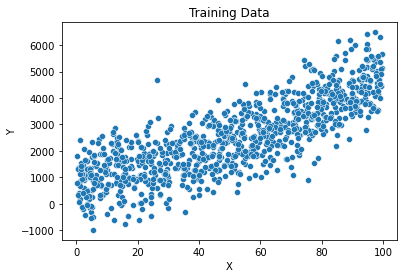

In [2]:
import seaborn as sns
sns.scatterplot(data = training_data, x = "X", y = "Y").set(title="Training Data")


[Text(0.5, 1.0, 'Test Data')]

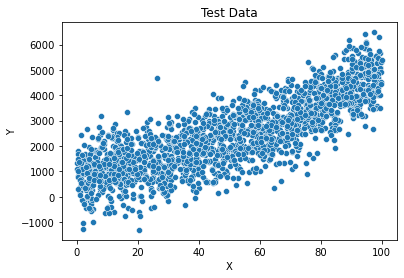

In [3]:
sns.scatterplot(data = test_data, x = "X", y = "Y").set(title="Test Data")

1c)  Now, we are going to calculate the test and training MSEs for three different candidate regression models:
  - F1:  $40x + 500$
  - F2:  $0.25x^2 + 15x + 915$
  - F3:  $0.001x^3 +0.07x^2 + 22x - 860$

Create three functions for these three candidate models - f1(), f2(), and f3().  They should take as an input $x$ and return the predicted value of $y$ corresponding to that input:

In [4]:
def f1(x):
    y=((40*x)+500)
    return y 

In [5]:
def f2(x):
    y=((0.25*(x**2))+(15*x)+(915))
    return y

In [6]:
def f3(x):
    y=((0.001*(x**3))+(0.07*(x**2))+(22*x)-(860))
    return y

1d)  Now, write a function calc_mse() that takes three parameter inputs:
  - $x$ - an array (or Pandas series) of predictor $X$ values
  - $y$ - an array (or Pandas series) of response $Y$ values
  - $f$ - a function to be called for each value of the $x$ and $y$ arrays
  
The function should calculate the MSE for the function $f$ using the $x$ and $y$ data arrays

In [7]:
import numpy as np
def calc_mse(df,func):
    list_x=df["X"].values.tolist()
    list_y=df["Y"].values.tolist()
    list_calc_y=[]
    for i in range(0,len(list_x)):
        list_calc_y.append(func(list_x[i]))
    MSE = (np.square(np.subtract(list_y,list_calc_y)).mean())
    print("MSE =",MSE)

1e)  Call this calc_mse function six times to calculate the training and test MSE for each of the three models:

In [8]:
print("MSE for Training data using f1")
calc_mse(training_data,f1)
print("MSE for Test data using f1")
calc_mse(test_data,f1)
print("MSE for Training data using f2")
calc_mse(training_data,f2)
print("MSE for Test data using f2")
calc_mse(test_data,f2)
print("MSE for Training data using f3")
calc_mse(training_data,f3)
print("MSE for Test data using f3")
calc_mse(test_data,f3)

MSE for Training data using f1
MSE = 651579.9579588177
MSE for Test data using f1
MSE = 641128.8822276238
MSE for Training data using f2
MSE = 617950.7022509746
MSE for Test data using f2
MSE = 601065.5232581282
MSE for Training data using f3
MSE = 3746108.245917581
MSE for Test data using f3
MSE = 3643289.575973644


1f)  Which of the three models would you select for use and why?

1g) Insted of writing functions, write a single line of Python code to calculate the test MSE for function F1.  Hint:  use the Python map and lambda functions.

In [9]:
from sklearn.metrics import mean_squared_error
print("MSE for training data using f1 "+str(mean_squared_error(training_data["Y"].values.tolist(),list(map(lambda x:((40*x)+500),training_data["X"].values.tolist() )))))
print("MSE for test data using f1 "+str(mean_squared_error(test_data["Y"].values.tolist(),list(map(lambda x:((40*x)+500),test_data["X"].values.tolist() )))))
print("MSE for training data using f2 "+str(mean_squared_error(training_data["Y"].values.tolist(),list(map(lambda x:((0.25*(x**2))+(15*x)+(915)),training_data["X"].values.tolist() )))))
print("MSE for test data using f2 "+str(mean_squared_error(test_data["Y"].values.tolist(),list(map(lambda x:((0.25*(x**2))+(15*x)+(915)),test_data["X"].values.tolist() )))))
print("MSE for training data using f3 "+str(mean_squared_error(training_data["Y"].values.tolist(),list(map(lambda x:((0.001*(x**3))+(0.07*(x**2))+(22*x)-(860)),training_data["X"].values.tolist() )))))
print("MSE for test data using f3 "+str(mean_squared_error(test_data["Y"].values.tolist(),list(map(lambda x:((0.001*(x**3))+(0.07*(x**2))+(22*x)-(860)),test_data["X"].values.tolist() )))))


MSE for training data using f1 651579.9579588177
MSE for test data using f1 641128.8822276238
MSE for training data using f2 617950.7022509746
MSE for test data using f2 601065.5232581282
MSE for training data using f3 3746108.245917581
MSE for test data using f3 3643289.575973644


#### 2.  KNN and Calculate Misclassification Rates

2a)  Read the file "Problem 2 Training Dataset.csv" into a dataframe called knn_training_data and the file 'Problem 2 Test Dataset.csv' into a dataframe called knn_test_data.  Display the first 10 rows of the knn_training_data dataframe.

In [10]:
import pandas as pd
knn_training_data=pd.read_csv("Problem 2 Training Dataset.csv")
knn_test_data=pd.read_csv("Problem 2 Test Dataset.csv")
display(knn_training_data.head(10))
display(knn_test_data.head(10))

,X1,X2,Y
0,68.936765,27.289798,Yellow
1,6.441438,94.429682,Red
2,11.456609,90.660702,Red
3,15.934097,28.927926,Red
4,44.847427,10.069445,Yellow
5,59.249555,62.548411,Blue
6,6.524247,86.135853,Red
7,10.158818,83.543817,Red
8,93.640622,32.986361,Yellow
9,18.484073,56.248987,Red


,X1,X2,Y
0,58.271758,21.169050,Yellow
1,52.610102,58.256975,Blue
2,22.743925,46.292871,Red
3,22.928611,23.782804,Red
4,28.829606,26.873953,Red
5,41.769966,84.340371,Blue
6,78.783755,10.819478,Yellow
7,58.959003,33.807893,Yellow
8,32.103775,83.987495,Red
9,44.027745,79.680364,Blue


2b)  Using Seaborn, create a color-coded scatterplot of the training data (where each point is colored with its category color).  For full credit, be sure to color the points correctly with yellow, blue, and red colors. 

[Text(0.5, 1.0, 'Training Data')]

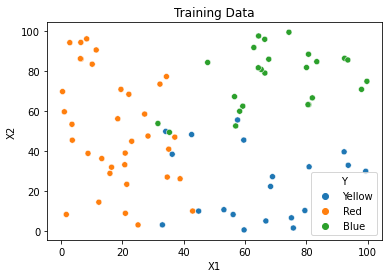

In [11]:
sns.scatterplot(data=knn_training_data, x="X1", y="X2", hue="Y").set(title="Training Data")

Now, we are going to create and assess predictions for the category of the test data using KNN-1 and KNN-3 algorithms. 

The problem sub-parts below will step you through the process of doing this.

2c)  Create a two-dimensional numpy array of size 20x80 that has the distance of each training set observation to each test set observation.  Use a Euclidean formula to calculate the distances.  Display the first row of the distance table (this row will show the distance of each training observation from the first observation in the test dataset)

In [12]:
import numpy as np
dist_arr=np.empty([len(knn_test_data),len(knn_training_data)])
for i in range(0,len(knn_test_data)):
    for j in range(0,len(knn_training_data)):
        dist_arr[i,j]=((((knn_training_data["X2"][j])-(knn_test_data["X2"][i]))**2)+(((knn_training_data["X1"][j])-(knn_test_data["X1"][i]))**2))**0.5
print(np.amin(dist_arr[0])) 
print(knn_training_data["Y"][np.where(dist_arr[0] == np.amin(dist_arr[0]))[0]])
print(dist_arr[0,33])
nn_list=dist_arr[0].tolist()
res = sorted(range(len(nn_list)), key = lambda sub: nn_list[sub])[:3]
print(str(res))
print(knn_training_data["Y"][res[0]])

10.112535207523653
33    Yellow
Name: Y, dtype: object
10.112535207523653
[33, 63, 0]
Yellow


2d)  Now create a dataframe with 20 rows (one per observation in the test dataset) and 3 columns labeled 'nn1_cat', 'nn2_cat', and 'nn3_cat'.  Populate the dataframe with the category color for the first, second, and third nearest neighbor for each observation.

Display the first ten rows of this dataframe

In [13]:
nearest_df=pd.DataFrame(columns=["nn1_cat","nn2_cat","nn3_cat"])
for neighbour in range(0,len(knn_test_data)):
    neighbour_list=dist_arr[neighbour].tolist()
    res = sorted(range(len(neighbour_list)), key = lambda sub: neighbour_list[sub])[:3]
    catnn1=knn_training_data["Y"][res[0]]
    catnn2=knn_training_data["Y"][res[1]]
    catnn3=knn_training_data["Y"][res[2]]
    nearest_df=nearest_df.append({"nn1_cat":catnn1,"nn2_cat":catnn2,"nn3_cat":catnn3},ignore_index=True)
display(nearest_df.head(10))    

,nn1_cat,nn2_cat,nn3_cat
0,Yellow,Yellow,Yellow
1,Yellow,Blue,Blue
2,Red,Red,Red
3,Red,Red,Red
4,Red,Red,Red
5,Blue,Red,Red
6,Yellow,Yellow,Yellow
7,Yellow,Yellow,Yellow
8,Red,Red,Blue
9,Blue,Red,Red


2e)  Create a series nn1_preds that has the prediction for each observation using a KNN1 algorithm.  Display the first 10 rows of the prediction series.

In [14]:
nn1_preds=pd.Series(nearest_df["nn1_cat"])
display(nn1_preds.head(10))

0    Yellow
1    Yellow
2       Red
3       Red
4       Red
5      Blue
6    Yellow
7    Yellow
8       Red
9      Blue
Name: nn1_cat, dtype: object

2f)  Calculate the misclassification rate for the KNN1 algorithm on this dataset

In [15]:
count=0
for test in range (0,len(knn_test_data)):
    if(knn_test_data["Y"][test]!=nn1_preds[test]):
        count=count+1
print("Missclasification rate is"+str((count/len(knn_test_data)*100)))

Missclasification rate is10.0


2g)  Create a Pandas series nn3_preds that has the prediction for each observation using a KNN3 algorithm.  Display the first 10 rows of the series.  (If the three nearest neighbors all have different color categories, use the first nearest neighbor category as the prediction)

In [16]:
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count
pred_list=[]
for index, rows in nearest_df.iterrows():
    my_list =[rows.nn1_cat, rows.nn2_cat, rows.nn3_cat]
    count_red=countX(my_list,"Red")
    count_yellow=countX(my_list,"Yellow")
    count_blue=countX(my_list,"Blue")
    if (count_red>count_blue&count_red>count_yellow):
        pred="Red"
    else:
        if(count_yellow>count_red&count_yellow>count_blue):
            pred="Yellow"
        else:
            if(count_blue>count_yellow&count_blue>count_red):
                pred="Blue"
            else:
                pred=my_list[0]
    pred_list.append(pred)
nn3_preds=pd.Series(pred_list)
display(nn3_preds.head(10))

0    Yellow
1    Yellow
2       Red
3       Red
4       Red
5      Blue
6    Yellow
7    Yellow
8       Red
9      Blue
dtype: object

2h) Calculate the misclassification rate for the KNN3 algorithm on this dataset

In [17]:
count=0
for test in range (0,len(knn_test_data)):
    if(knn_test_data["Y"][test]!=nn3_preds[test]):
        count=count+1
print("Missclasification rate is"+str((count/len(knn_test_data)*100)))

Missclasification rate is10.0
